<a href="https://colab.research.google.com/github/SUBHADEEP1710/Global-Terrorism_EDA/blob/master/Global_Terrorism_Subhadeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
#import reqd packages


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#mount drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path='/content/drive/MyDrive/globalterrorismdb_0718dist.csv'
#load the file

In [ ]:
df=pd.read_csv(file_path,encoding = "ISO-8859-1")
#construct dataframe

<ipython-input-85-479ad4c07d21>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path,encoding = "ISO-8859-1")


In [ ]:
df.head(5)
#top 5 rows

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.shape
#shape of the dataframe

(181691, 135)

In [ ]:
df.head().iloc[:,100:]
#columns after 100

,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
null_percent = (df.isnull().sum() / len(df)) * 100
null_percent_sorted = null_percent.sort_values(ascending=False)
high_null_columns = null_percent_sorted[null_percent_sorted >= 50]
low_null_columns = null_percent_sorted[null_percent_sorted < 50]
print(f'Number of columns where null value is less than fifty percent: {len(low_null_columns)}')
less_null_column_names = low_null_columns.index.to_list()
print(less_null_column_names)
# columns where null value is less than fifty percent

Number of columns where null value is less than fifty percent: 58
['nperps', 'nperpcap', 'nwoundte', 'weapdetail', 'nkillter', 'scite1', 'summary', 'claimed', 'nwoundus', 'nkillus', 'corp1', 'weapsubtype1', 'weapsubtype1_txt', 'nwound', 'targsubtype1', 'targsubtype1_txt', 'nkill', 'longitude', 'latitude', 'natlty1', 'natlty1_txt', 'target1', 'city', 'provstate', 'guncertain1', 'ishostkid', 'specificity', 'doubtterr', 'multiple', 'crit1', 'iyear', 'iday', 'imonth', 'targtype1_txt', 'gname', 'individual', 'dbsource', 'country', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'extended', 'region_txt', 'country_txt', 'region', 'crit2', 'targtype1', 'weaptype1', 'weaptype1_txt', 'attacktype1_txt', 'attacktype1', 'vicinity', 'suicide', 'success', 'crit3', 'property', 'eventid']


In [ ]:
new_df=df[less_null_column_names]
#new dataframe

In [ ]:
new_df.shape
#shape of the new dataframe

(181691, 58)

In [ ]:
check=new_df.columns.to_list()
print(check)
#check the columns

['nperps', 'nperpcap', 'nwoundte', 'weapdetail', 'nkillter', 'scite1', 'summary', 'claimed', 'nwoundus', 'nkillus', 'corp1', 'weapsubtype1', 'weapsubtype1_txt', 'nwound', 'targsubtype1', 'targsubtype1_txt', 'nkill', 'longitude', 'latitude', 'natlty1', 'natlty1_txt', 'target1', 'city', 'provstate', 'guncertain1', 'ishostkid', 'specificity', 'doubtterr', 'multiple', 'crit1', 'iyear', 'iday', 'imonth', 'targtype1_txt', 'gname', 'individual', 'dbsource', 'country', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'extended', 'region_txt', 'country_txt', 'region', 'crit2', 'targtype1', 'weaptype1', 'weaptype1_txt', 'attacktype1_txt', 'attacktype1', 'vicinity', 'suicide', 'success', 'crit3', 'property', 'eventid']


In [ ]:
selected_columns_1=['eventid','iyear', 'imonth', 'iday','country_txt','region_txt','city','multiple', 'success', 'suicide',
 'attacktype1_txt', 'targtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'weaptype1_txt','nkill','nwoundus',
'claimed', 'doubtterr', 'specificity','gname', 'ishostkid', 'provstate']
#selected columns

In [ ]:
len(check)-len(selected_columns_1)

34

In [ ]:
df_1=df[selected_columns_1]
#new dataframe

In [ ]:
df_1.T
#transpose the dataframe

,0,1,2,3,4,5,6,7,8,9,...,181681,181682,181683,181684,181685,181686,181687,181688,181689,181690
eventid,197000000001,197000000002,197001000001,197001000002,197001000003,197001010002,197001020001,197001020002,197001020003,197001030001,...,201712310016,201712310017,201712310018,201712310019,201712310020,201712310022,201712310029,201712310030,201712310031,201712310032
iyear,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
imonth,7,0,1,1,1,1,1,1,1,1,...,12,12,12,12,12,12,12,12,12,12
iday,2,0,0,0,0,1,2,2,2,3,...,31,31,31,31,31,31,31,31,31,31
country_txt,Dominican Republic,Mexico,Philippines,Greece,Japan,United States,Uruguay,United States,United States,United States,...,Philippines,Italy,Afghanistan,India,Afghanistan,Somalia,Syria,Philippines,India,Philippines
region_txt,Central America & Caribbean,North America,Southeast Asia,Western Europe,East Asia,North America,South America,North America,North America,North America,...,Southeast Asia,Western Europe,South Asia,South Asia,South Asia,Sub-Saharan Africa,Middle East & North Africa,Southeast Asia,South Asia,Southeast Asia
city,Santo Domingo,Mexico city,Unknown,Athens,Fukouka,Cairo,Montevideo,Oakland,Madison,Madison,...,Shariff Aguak,Spinetoli,Kohistan district,Hungrum,Maymana,Ceelka Geelow,Jableh,Kubentog,Imphal,Cotabato City
multiple,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
success,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,0,0
suicide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
(df_1.isnull().sum()/len(df_1))*100
#null values percentage

eventid             0.000000
iyear               0.000000
imonth              0.000000
iday                0.000000
country_txt         0.000000
region_txt          0.000000
city                0.239417
multiple            0.000550
success             0.000000
suicide             0.000000
attacktype1_txt     0.000000
targtype1_txt       0.000000
corp1              23.419982
target1             0.351146
natlty1_txt         0.858050
weaptype1_txt       0.000000
nkill               5.676120
nwoundus           35.611010
claimed            36.391456
doubtterr           0.000550
specificity         0.003302
gname               0.000000
ishostkid           0.097969
provstate           0.231712
dtype: float64

In [ ]:
df_1.info()
#info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          181691 non-null  int64  
 1   iyear            181691 non-null  int64  
 2   imonth           181691 non-null  int64  
 3   iday             181691 non-null  int64  
 4   country_txt      181691 non-null  object 
 5   region_txt       181691 non-null  object 
 6   city             181256 non-null  object 
 7   multiple         181690 non-null  float64
 8   success          181691 non-null  int64  
 9   suicide          181691 non-null  int64  
 10  attacktype1_txt  181691 non-null  object 
 11  targtype1_txt    181691 non-null  object 
 12  corp1            139139 non-null  object 
 13  target1          181053 non-null  object 
 14  natlty1_txt      180132 non-null  object 
 15  weaptype1_txt    181691 non-null  object 
 16  nkill            171378 non-null  floa

In [ ]:
df_1.head(10)
#top 10 rows of new dataframe

,eventid,iyear,imonth,iday,country_txt,region_txt,city,multiple,success,suicide,...,natlty1_txt,weaptype1_txt,nkill,nwoundus,claimed,doubtterr,specificity,gname,ishostkid,provstate
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,0.0,1,0,...,Dominican Republic,Unknown,1.0,NaN,NaN,0.0,1.0,MANO-D,0.0,NaN
1,197000000002,1970,0,0,Mexico,North America,Mexico city,0.0,1,0,...,Belgium,Unknown,0.0,NaN,NaN,0.0,1.0,23rd of September Communist League,1.0,Federal
2,197001000001,1970,1,0,Philippines,Southeast Asia,Unknown,0.0,1,0,...,United States,Unknown,1.0,NaN,NaN,0.0,4.0,Unknown,0.0,Tarlac
3,197001000002,1970,1,0,Greece,Western Europe,Athens,0.0,1,0,...,United States,Explosives,NaN,NaN,NaN,0.0,1.0,Unknown,0.0,Attica
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,0.0,1,0,...,United States,Incendiary,NaN,NaN,NaN,-9.0,1.0,Unknown,0.0,Fukouka
5,197001010002,1970,1,1,United States,North America,Cairo,0.0,1,0,...,United States,Firearms,0.0,0.0,0.0,0.0,1.0,Black Nationalists,0.0,Illinois
6,197001020001,1970,1,2,Uruguay,South America,Montevideo,0.0,0,0,...,Uruguay,Firearms,0.0,NaN,NaN,0.0,1.0,Tupamaros (Uruguay),0.0,Montevideo
7,197001020002,1970,1,2,United States,North America,Oakland,0.0,1,0,...,United States,Explosives,0.0,0.0,0.0,1.0,1.0,Unknown,0.0,California
8,197001020003,1970,1,2,United States,North America,Madison,0.0,1,0,...,United States,Incendiary,0.0,0.0,1.0,0.0,1.0,New Year's Gang,0.0,Wisconsin
9,197001030001,1970,1,3,United States,North America,Madison,0.0,1,0,...,United States,Incendiary,0.0,0.0,0.0,0.0,1.0,New Year's Gang,0.0,Wisconsin


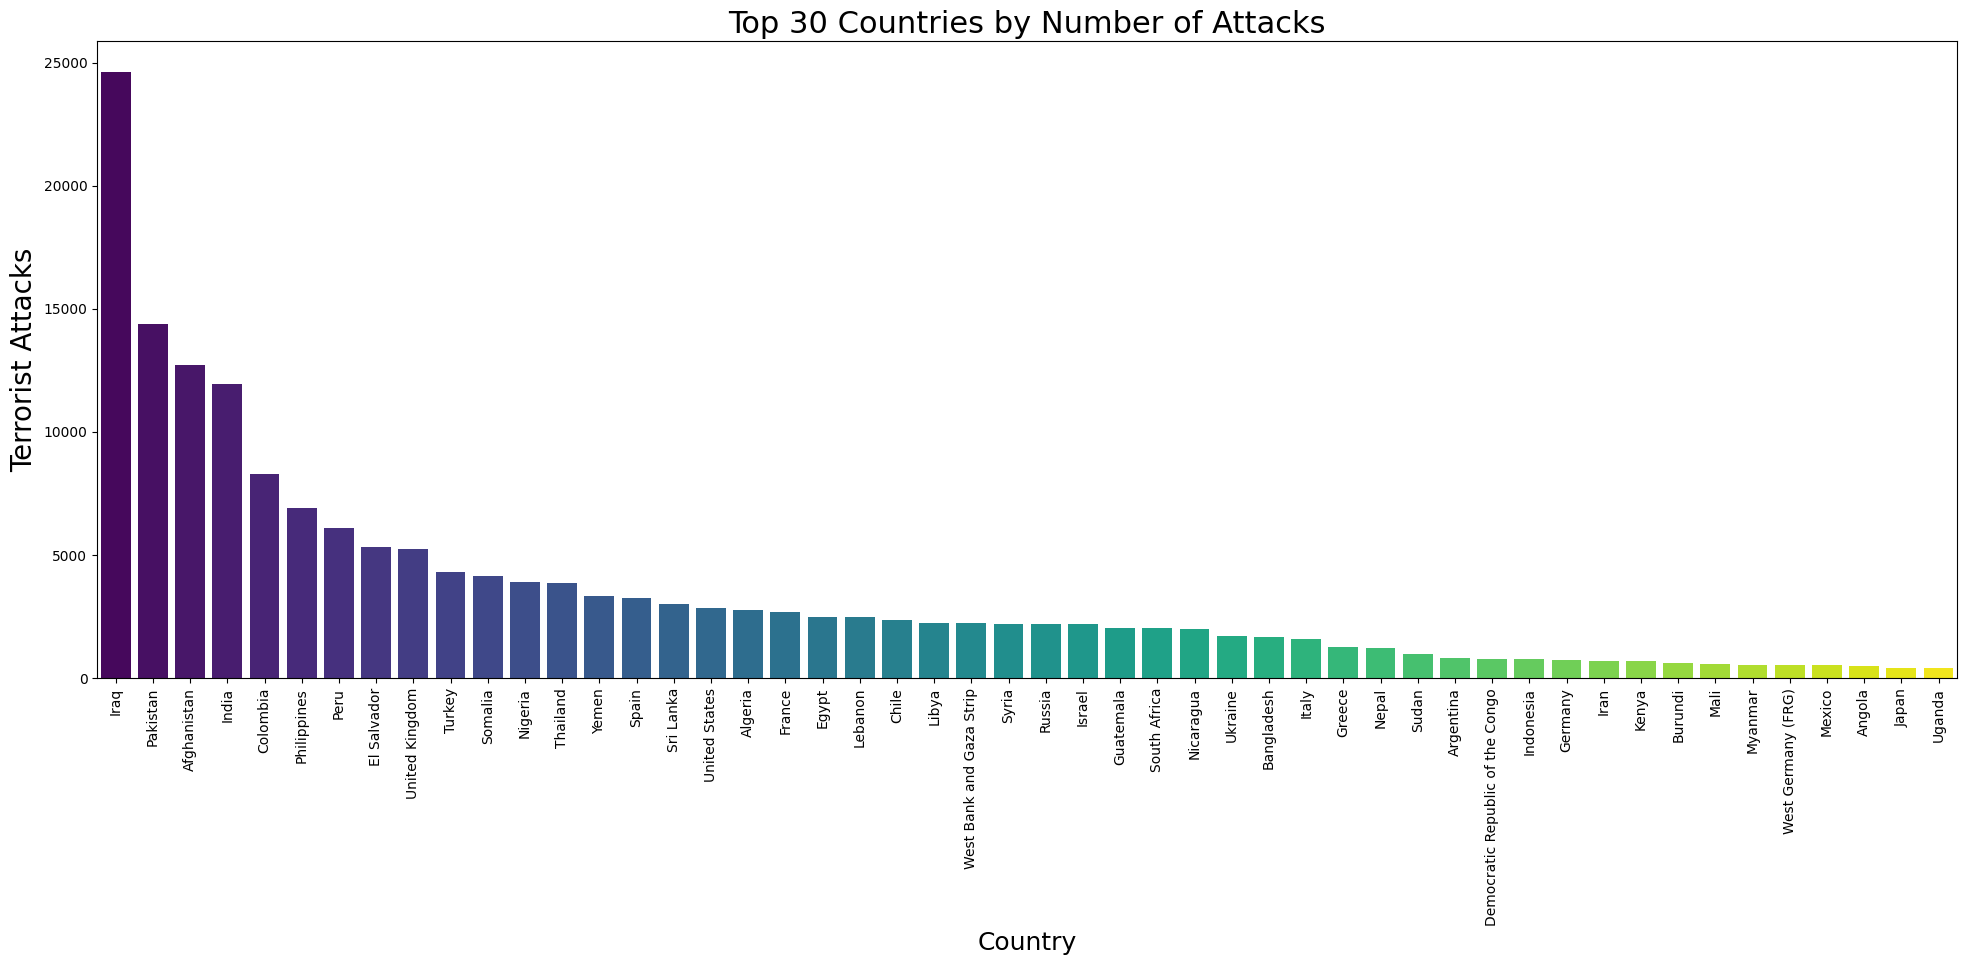

In [ ]:
plt.rcParams['figure.figsize'] = (24, 8.27)

ax = sns.countplot(x='country_txt', data=df_1, order=df_1['country_txt'].value_counts().index[:50])

ax.set_xlabel('Country', fontsize=18)
plt.xticks(rotation=90)
ax.set_ylabel('Terrorist Attacks', fontsize=20)

palette = sns.color_palette("viridis", n_colors=len(ax.patches))
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(palette[i])

ax.set_title('Top 30 Countries by Number of Attacks', fontsize=22)
plt.show()
# Countries by number of attacks

<ipython-input-101-e2084fc3d0a1>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


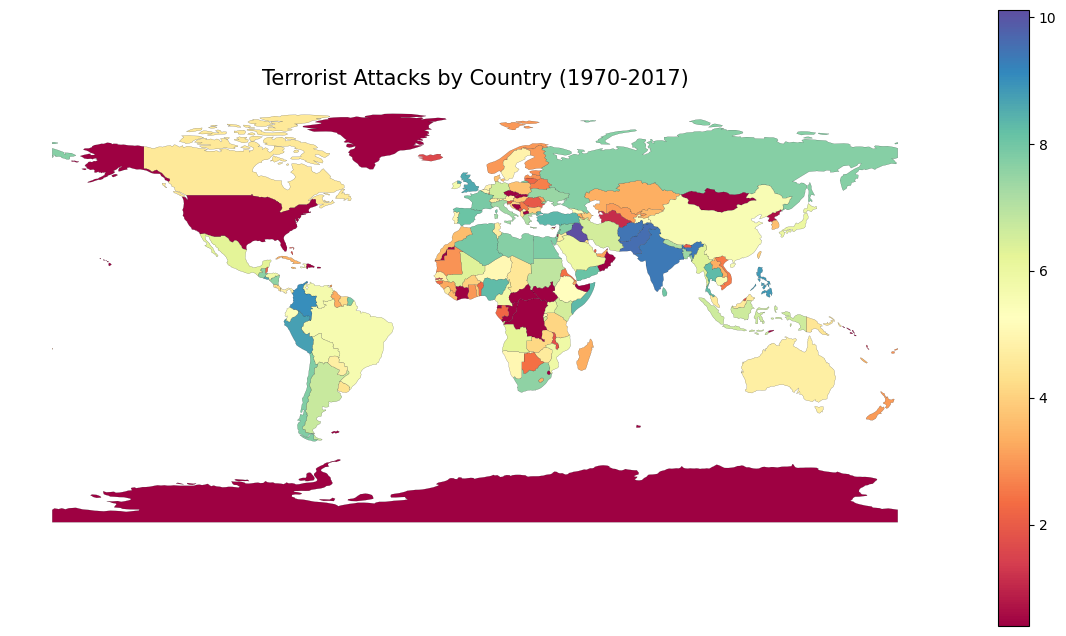

In [ ]:
attacks_by_country = df_1['country_txt'].value_counts().reset_index()
attacks_by_country.columns = ['Country', 'Attacks']
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(attacks_by_country, left_on='name', right_on='Country', how='left')
world['Attacks'] = world['Attacks'].fillna(0.5)

world['Attacks_log'] = np.log(world['Attacks'] + 1)

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.plot(column='Attacks_log', cmap='Spectral', linewidth=0.1, ax=ax, edgecolor='0', legend=True)

ax.set_title('Terrorist Attacks by Country (1970-2017)', fontsize=15)
ax.axis('off')

plt.show()
# world map showing log values of attacks on each country for better distinction

In [ ]:
attack_per_year=df_1['iyear'].value_counts()

<ipython-input-103-794b6d431bed>:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = ax.figure.colorbar(sm)


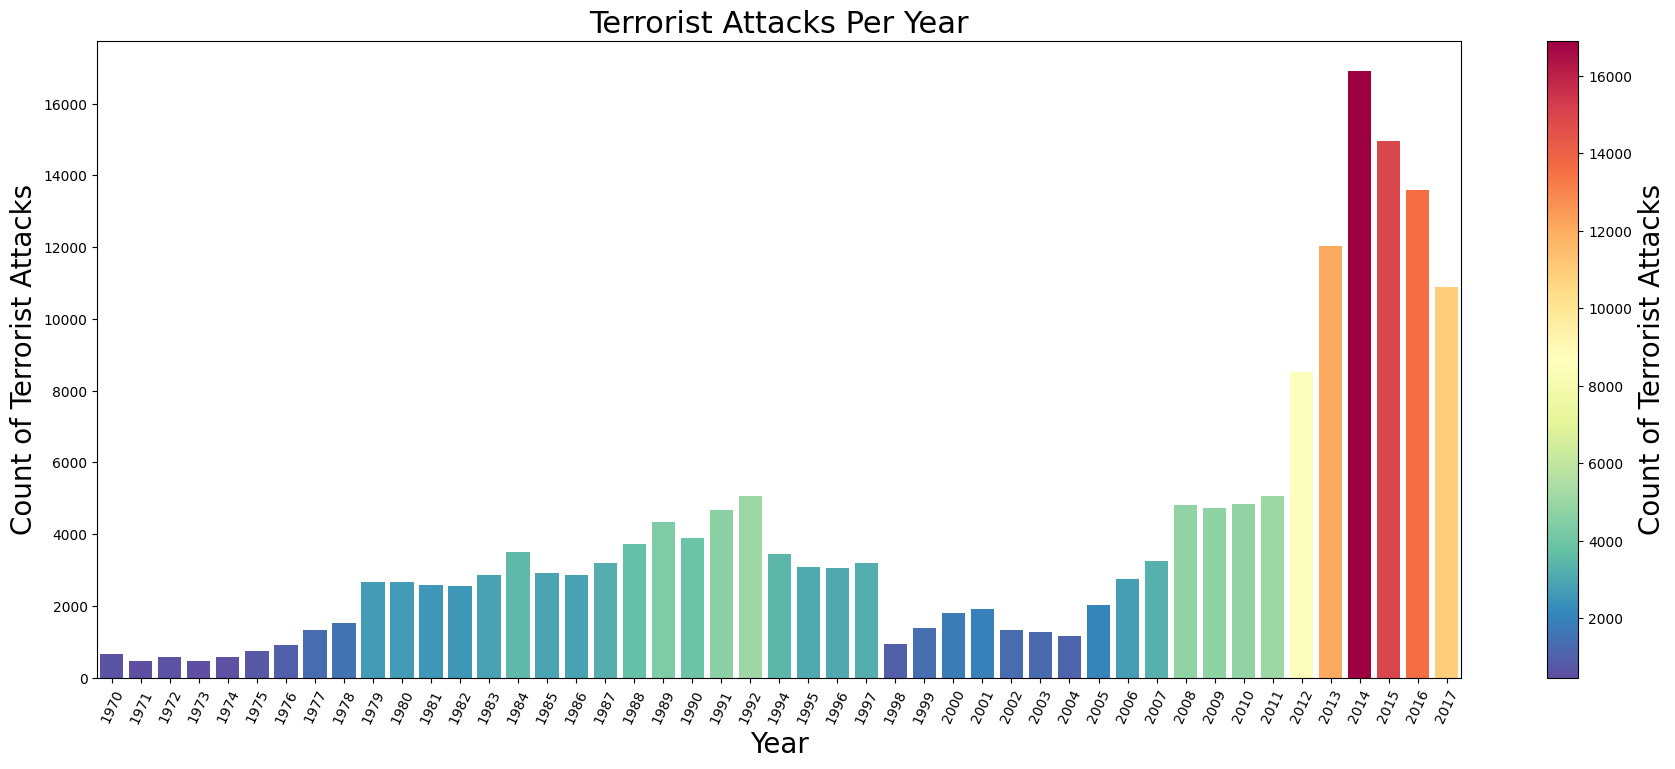

In [ ]:
plt.rcParams['figure.figsize'] = (22, 8.27)

ax = sns.countplot(x='iyear', data=df_1)
ax.set_xlabel('Year', fontsize=20)
plt.xticks(rotation=65)
ax.set_ylabel('Count of Terrorist Attacks', fontsize=20)
counts = df_1['iyear'].value_counts().sort_index()

norm = plt.Normalize(counts.min(), counts.max())
sm = plt.cm.ScalarMappable(cmap=plt.cm.Spectral.reversed(), norm=norm)
sm.set_array([])

for i, patch in enumerate(ax.patches):
    height = patch.get_height()
    patch.set_facecolor(sm.to_rgba(height))

cbar = ax.figure.colorbar(sm)
cbar.set_label('Count of Terrorist Attacks', fontsize=20)
ax.set_title('Terrorist Attacks Per Year', fontsize=22)
plt.show()
# Plot showing number of terrorist attacks per year

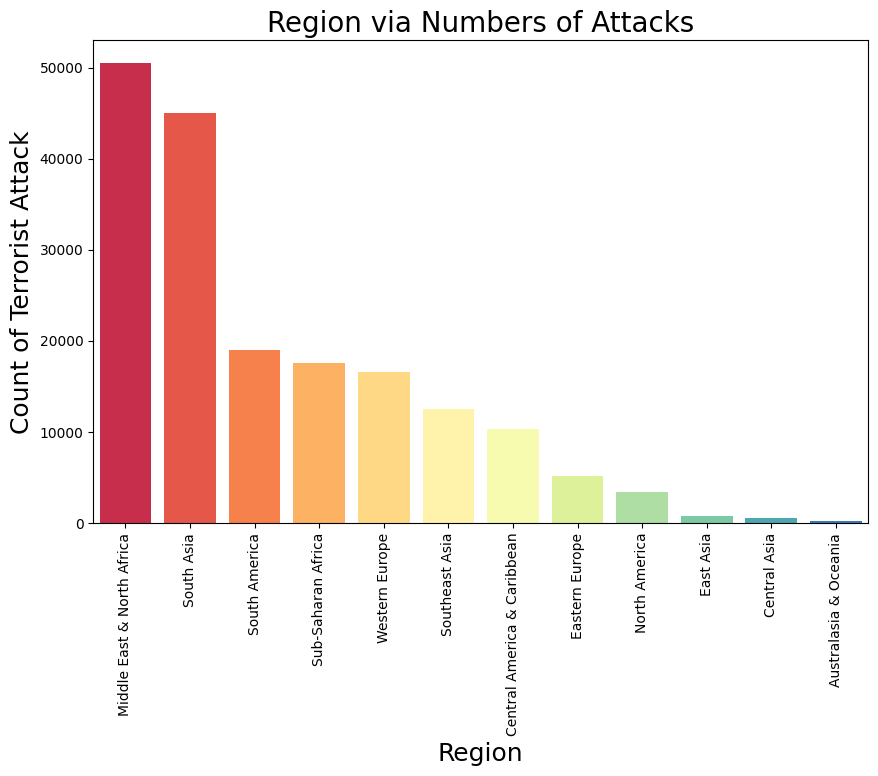

In [ ]:
ax=plt.rcParams['figure.figsize'] = 10,6.27
ax=sns.countplot(x='region_txt',data=df_1,order = df_1['region_txt'].value_counts().index)
ax.set_xlabel('Region',fontsize=18)
plt.xticks(rotation = 90)
ax.set_ylabel('Count of Terrorist Attack',fontsize=18)
palette = sns.color_palette("Spectral", n_colors=len(ax.patches))
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(palette[i])
ax.set_title('Region via Numbers of Attacks',fontsize=20);
#plot showing number of attacks in each region

<ipython-input-105-e51e653fb62d>:28: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = ax.figure.colorbar(sm)


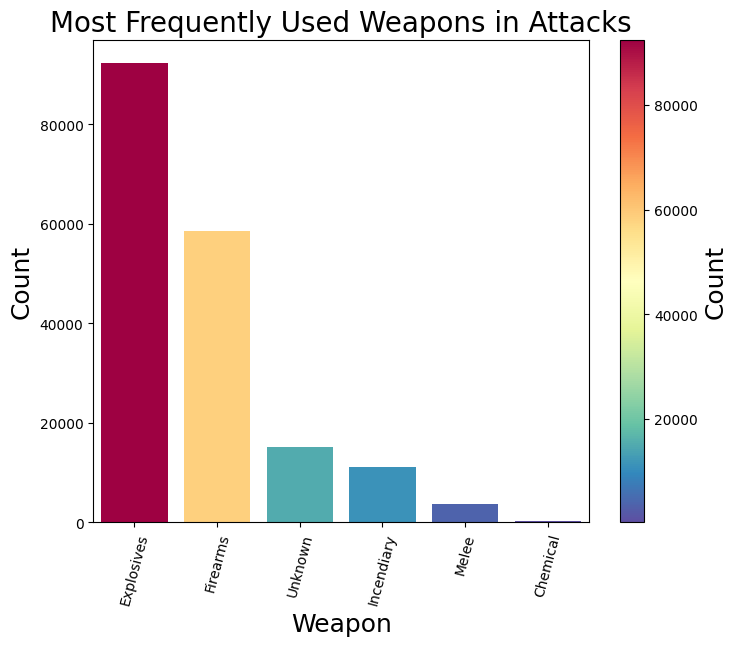

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6.27)
ax = sns.countplot(x='weaptype1_txt', data=df_1, order=df_1['weaptype1_txt'].value_counts().index[:6])
ax.set_xlabel('Weapon', fontsize=18)
plt.xticks(rotation=75)
ax.set_ylabel('Count', fontsize=18)
counts = df_1['weaptype1_txt'].value_counts().iloc[:6]
norm = plt.Normalize(counts.min(), counts.max())
sm = plt.cm.ScalarMappable(cmap=plt.cm.Spectral.reversed(), norm=norm)
sm.set_array([])

for i, patch in enumerate(ax.patches):
    height = patch.get_height()
    patch.set_facecolor(sm.to_rgba(height))
ax.set_title('Most Frequently Used Weapons in Attacks', fontsize=20)
cbar = ax.figure.colorbar(sm)
cbar.set_label('Count', fontsize=18)
plt.show()
# types of weapons used

<ipython-input-106-422bf5597fc2>:28: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = ax.figure.colorbar(sm)


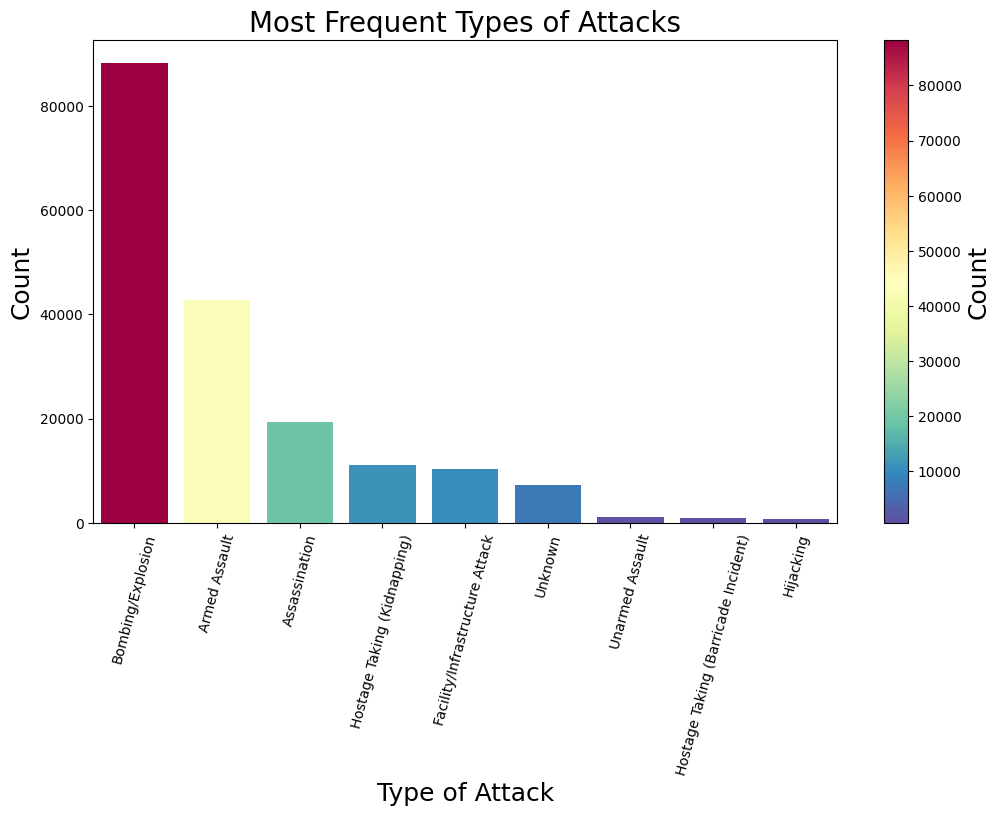

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6.27)
ax = sns.countplot(x='attacktype1_txt', data=df_1, order=df_1['attacktype1_txt'].value_counts().index)
ax.set_xlabel('Type of Attack', fontsize=18)
plt.xticks(rotation=75)
ax.set_ylabel('Count', fontsize=18)

counts = df_1['attacktype1_txt'].value_counts()

norm = plt.Normalize(counts.min(), counts.max())
sm = plt.cm.ScalarMappable(cmap=plt.cm.Spectral.reversed(), norm=norm)
sm.set_array([])

for i, patch in enumerate(ax.patches):
    height = patch.get_height()
    patch.set_facecolor(sm.to_rgba(height))
ax.set_title('Most Frequent Types of Attacks', fontsize=20)
cbar = ax.figure.colorbar(sm)
cbar.set_label('Count', fontsize=18)
plt.show()
# types of attacks

<ipython-input-107-e4ce4a7bf3d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


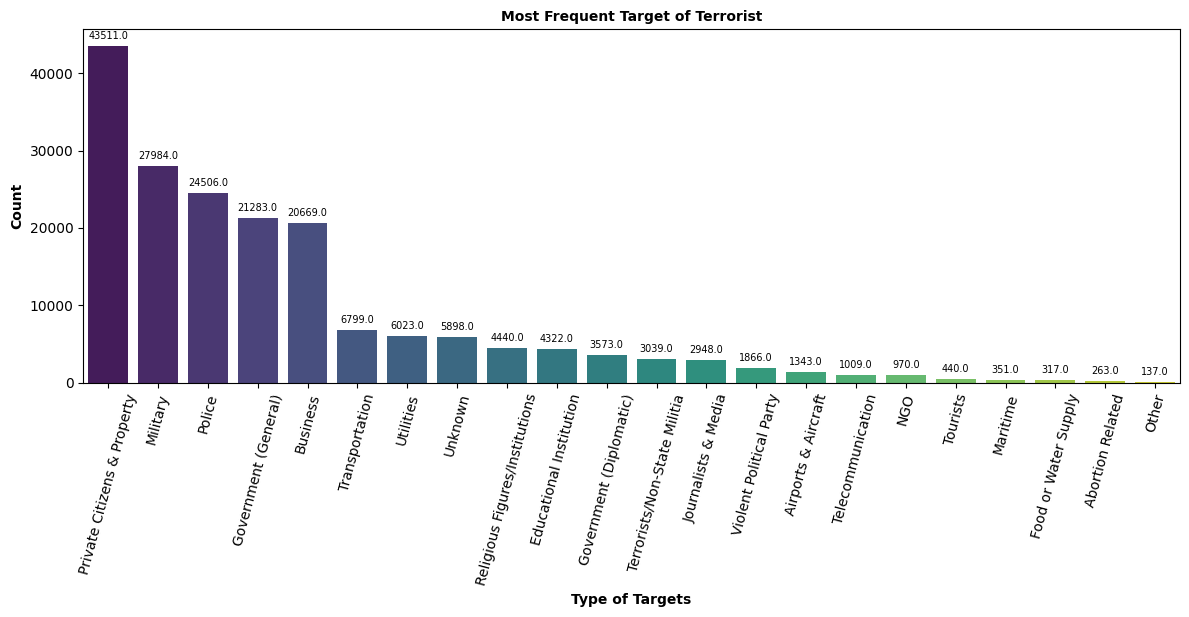

In [ ]:
plt.figure(figsize=(12, 6.27))
ax = sns.countplot(
    x='targtype1_txt',
    data=df_1,
    order=df_1['targtype1_txt'].value_counts().index,
    palette='viridis'
)

ax.set_xlabel('Type of Targets', fontsize=10, fontweight='bold')
ax.set_ylabel('Count', fontsize=10, fontweight='bold')
ax.set_title('Most Frequent Target of Terrorist', fontsize=10, fontweight='bold')

plt.xticks(rotation=75, fontsize=10)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='baseline',
        fontsize=7,
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )
plt.tight_layout()
plt.show()
# types of targets

<ipython-input-112-36207a4ea705>:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = ax.figure.colorbar(sm)


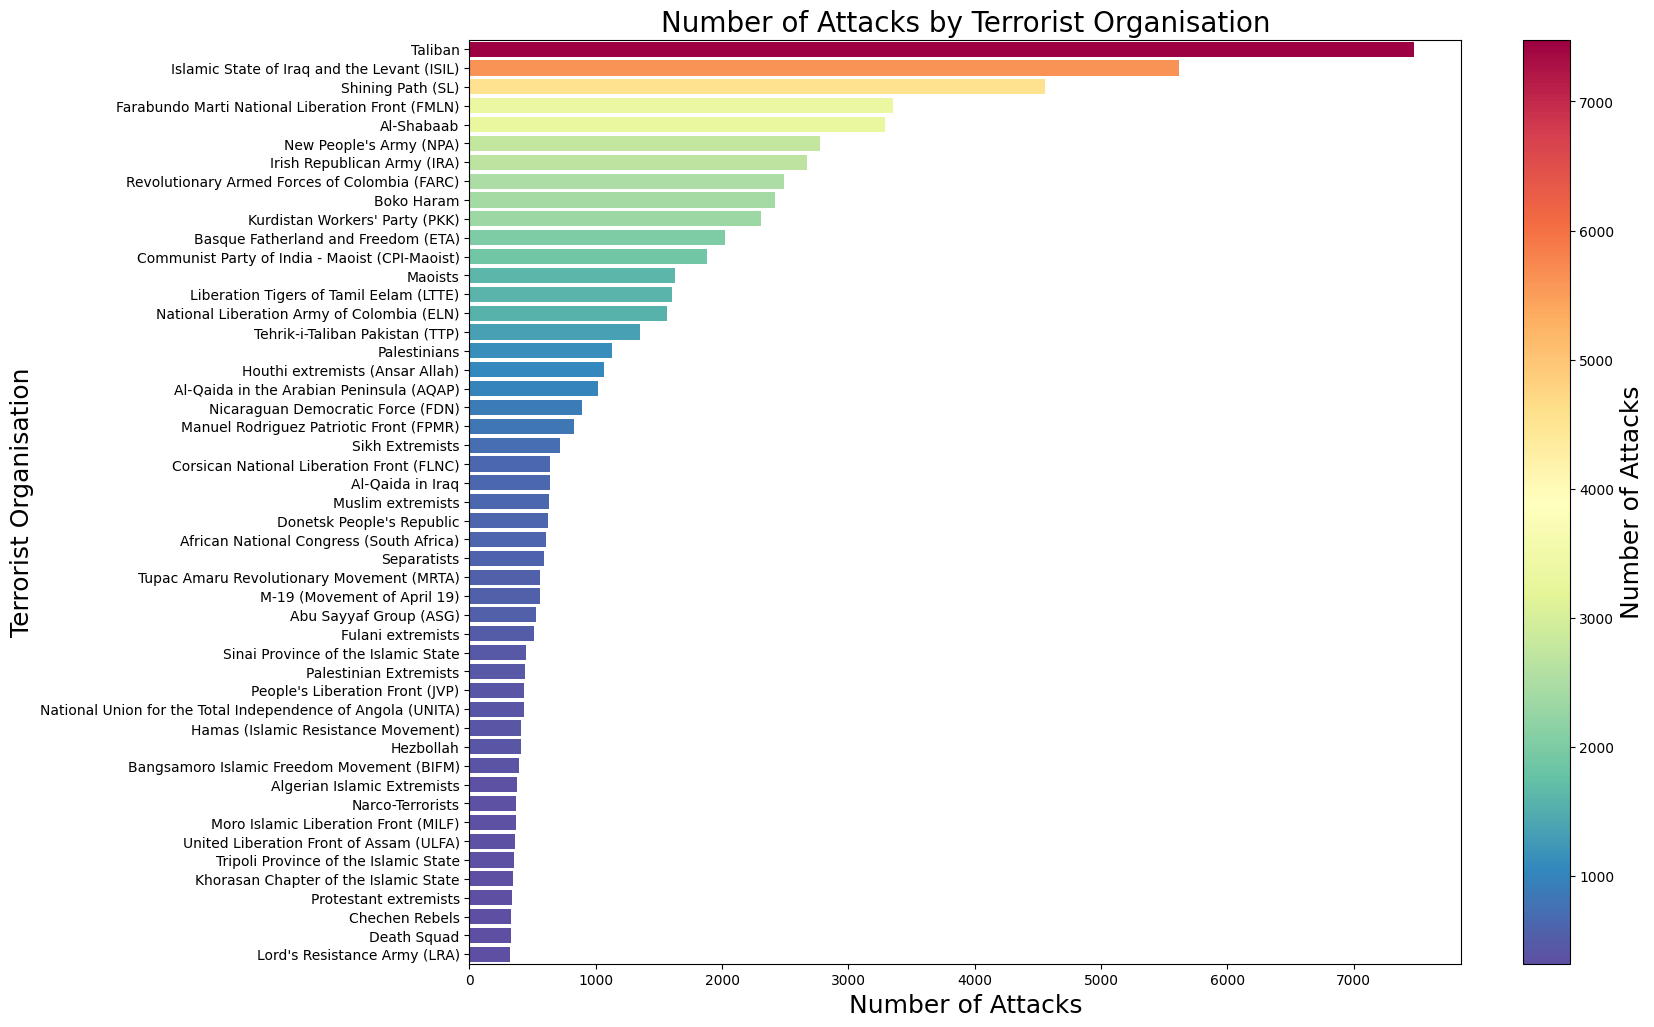

In [ ]:
plt.rcParams['figure.figsize'] = (16, 12)

ax = sns.countplot(y='gname', data=df_1, order=df_1['gname'].value_counts().index[1:50])

ax.set_xlabel('Number of Attacks', fontsize=18)
ax.set_ylabel('Terrorist Organisation', fontsize=18)

counts = df_1['gname'].value_counts().iloc[1:50]

norm = plt.Normalize(counts.min(), counts.max())
sm = plt.cm.ScalarMappable(cmap=plt.cm.Spectral.reversed(), norm=norm)
sm.set_array([])

for i, patch in enumerate(ax.patches):
    height = patch.get_width()
    patch.set_facecolor(sm.to_rgba(height))

cbar = ax.figure.colorbar(sm)
cbar.set_label('Number of Attacks', fontsize=18)

ax.set_title('Number of Attacks by Terrorist Organisation', fontsize=20)

plt.show()
#number of attacks by terrorist organisations

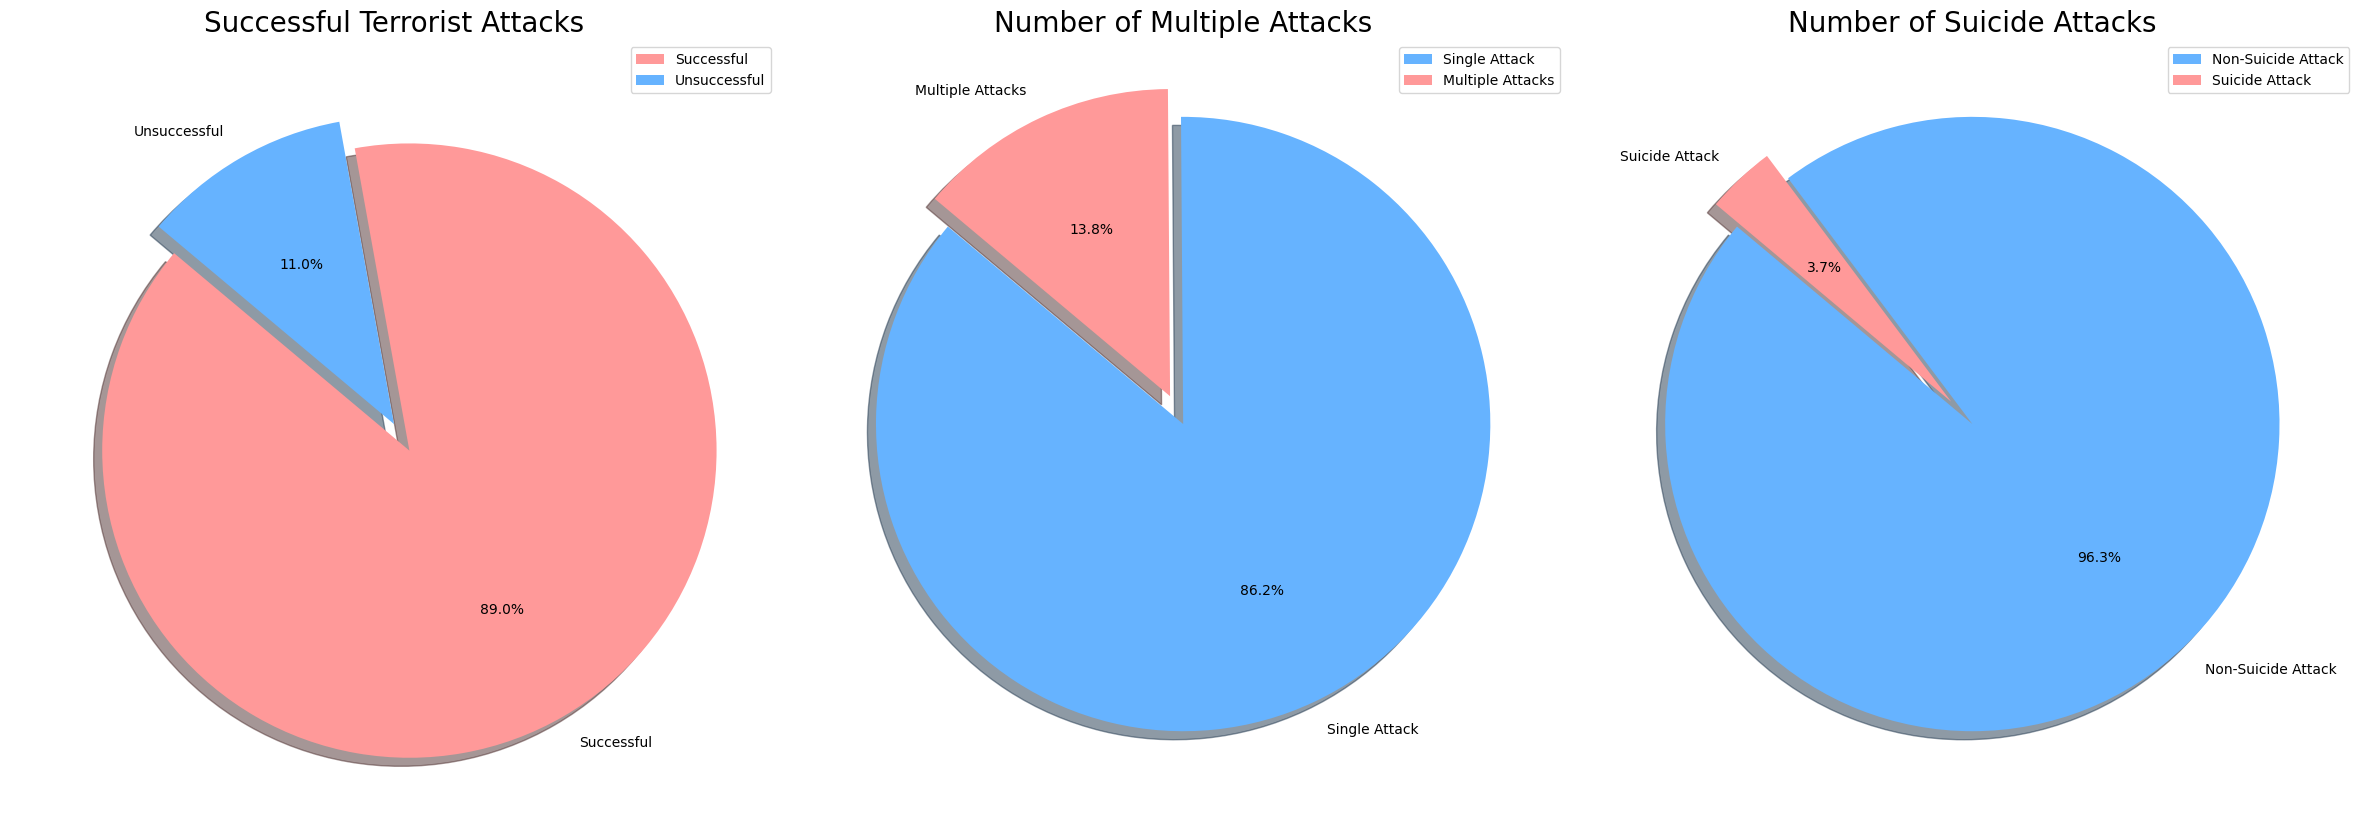

In [ ]:
success_counts = df_1['success'].value_counts()
labels_success = ['Successful', 'Unsuccessful']
colors_success = ['#ff9999', '#66b3ff']
explode_success = (0.1, 0)

multiple_counts = df_1['multiple'].value_counts()
labels_multiple = ['Single Attack', 'Multiple Attacks']
colors_multiple = ['#66b3ff', '#ff9999']
explode_multiple = (0, 0.1)

suicide_counts = df_1['suicide'].value_counts()
labels_suicide = ['Non-Suicide Attack', 'Suicide Attack']
colors_suicide = ['#66b3ff', '#ff9999']
explode_suicide = (0, 0.1)

fig, axs = plt.subplots(1, 3, figsize=(24, 8))

axs[0].pie(success_counts, labels=labels_success, colors=colors_success, explode=explode_success, autopct='%1.1f%%',
           startangle=140, shadow=True)
axs[0].set_title('Successful Terrorist Attacks', fontsize=20)
axs[0].legend(labels_success, loc="best")

axs[1].pie(multiple_counts, labels=labels_multiple, colors=colors_multiple, explode=explode_multiple, autopct='%1.1f%%',
           startangle=140, shadow=True)
axs[1].set_title('Number of Multiple Attacks', fontsize=20)
axs[1].legend(labels_multiple, loc="best")

axs[2].pie(suicide_counts, labels=labels_suicide, colors=colors_suicide, explode=explode_suicide, autopct='%1.1f%%',
           startangle=140, shadow=True)
axs[2].set_title('Number of Suicide Attacks', fontsize=20)
axs[2].legend(labels_suicide, loc="best")

plt.tight_layout()
plt.show()


In [ ]:
suceess_country=df_1.groupby('country_txt').agg({'eventid':'count','success':'sum'}).reset_index()
suceess_country.columns=['Country','Total_Attacks','Attack_Success']
suceess_country['Attack_Failed']=suceess_country['Total_Attacks']-suceess_country['Attack_Success']
suceess_country['Failure_Rate_Attack']=(suceess_country['Attack_Failed']/suceess_country['Total_Attacks'])*100
suceess_country['Success_Rate_Attack']=(suceess_country['Attack_Success']/suceess_country['Total_Attacks'])*100
suceess_country=suceess_country.round(2)

<ipython-input-114-acccb5bd4a94>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Country', y='Failure_Rate_Attack', data=plot_able_stop_terror_attack, palette='viridis')


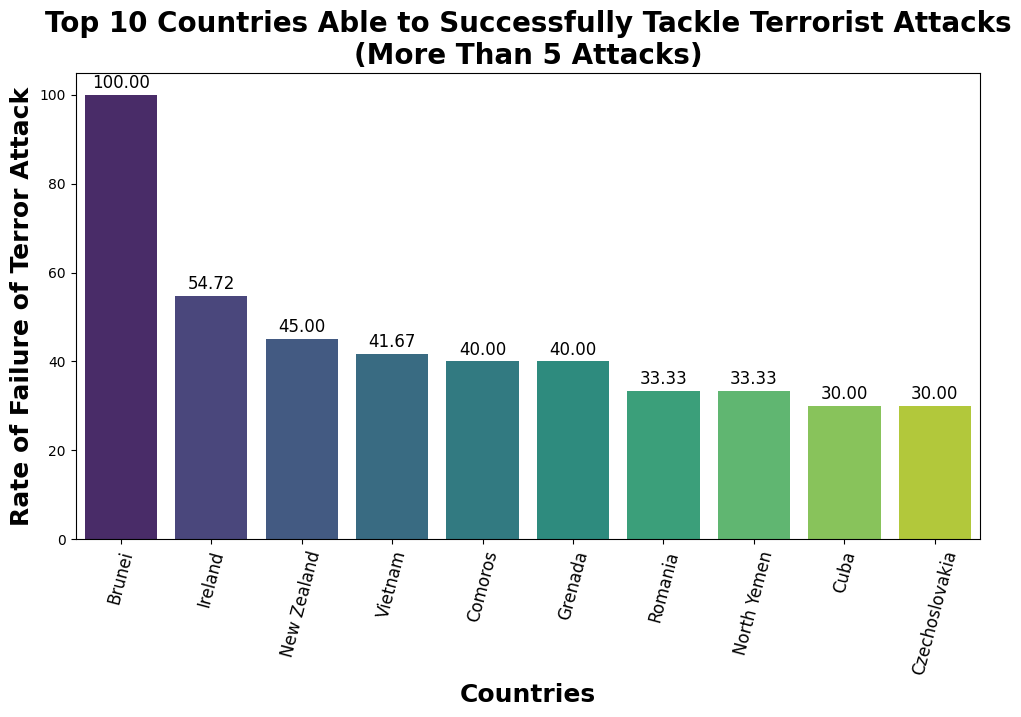

In [ ]:
able_stop_terror_attack = suceess_country[suceess_country['Total_Attacks'] >= 5].sort_values('Failure_Rate_Attack', ascending=False)[:10]
plot_able_stop_terror_attack = able_stop_terror_attack.loc[:, ['Country', 'Failure_Rate_Attack']]

plt.figure(figsize=(10, 7.27))

ax = sns.barplot(x='Country', y='Failure_Rate_Attack', data=plot_able_stop_terror_attack, palette='viridis')

ax.set_xlabel('Countries', fontsize=18, fontweight='bold')
ax.set_ylabel('Rate of Failure of Terror Attack', fontsize=18, fontweight='bold')
ax.set_title('Top 10 Countries Able to Successfully Tackle Terrorist Attacks\n(More Than 5 Attacks)', fontsize=20, fontweight='bold')

plt.xticks(rotation=75, fontsize=12)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='baseline',
        fontsize=12,
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()
#countries to successfully tackle terrorist attacks